Import libraries

In [86]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#load data
data = pd.read_csv("loan.csv")

/tmp/ipykernel_20609/1885210062.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan.csv")


In [88]:
#Read the data dictionary which describes the meaning of variables in data
data_dict = pd.read_excel("Data_Dictionary.xlsx")

In [89]:
data.shape


(39717, 111)

In [90]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [91]:
data_dict.shape

(117, 2)

In [92]:
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [93]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [94]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [95]:
cols_with_na= data.columns[data.isna().all()].tolist()
cols_with_na
len(cols_with_na)


54

In [96]:
#Ref : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
data.dropna(axis=1,inplace= True,how='all')

In [97]:
data.shape

(39717, 57)

In [98]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [99]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [100]:
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [101]:
# No impact :: checking columns for irrelevant data 
data.nunique().sort_values(ascending=True)

pymnt_plan                        1
policy_code                       1
application_type                  1
acc_now_delinq                    1
delinq_amnt                       1
chargeoff_within_12_mths          1
tax_liens                         1
initial_list_status               1
collections_12_mths_ex_med        1
term                              2
next_pymnt_d                      2
loan_status                       3
pub_rec_bankruptcies              3
verification_status               3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [102]:
data1 = data.loc[:,data.nunique()>1]


In [103]:
data1.nunique().sort_values(ascending=True)

term                           2
next_pymnt_d                   2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection

In [104]:
data1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [105]:
data1.shape

(39717, 48)

Customer info
Credit info
loan info

Dropping records where loan_status = 'Current'


In [106]:
data1 = data1[data1.loan_status != 'Current']
data1.shape

(38577, 48)

Dropping columns where missing data is >= 65%


In [107]:
for col in data1.columns:
    missing_values = data1[col].isna().mean().round(2)
    if missing_values >= 0.65:
        data1.drop(col, axis = 1, inplace = True)

In [108]:
data1.shape

(38577, 45)

In [109]:
data1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Identifying the list of columns which can be dropped as it will not contribute to our analysis
Baiscally these are the information gathered after approving the load first time so it make sense to drop these information.

In [110]:
to_be_dropped=[
    'emp_title',
    'url',
    'desc',
    'title',
    'zip_code',
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d'
]

In [111]:
data1.drop(to_be_dropped, axis = 1, inplace = True)

In [112]:
data1.shape

(38577, 21)

In [113]:
len(data1['member_id'].unique())

38577

In [114]:
len(data1['id'].unique())

38577

Looks like both member_id and id are unique, wont contribute to analysis

In [115]:
data1.drop(['member_id', 'id'], axis = 1, inplace = True)

In [116]:
data1.shape

(38577, 19)

In [117]:
data1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'recoveries', 'pub_rec_bankruptcies'],
      dtype='object')

In [118]:
data1.shape

(38577, 19)

In [119]:
data1.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
recoveries              float64
pub_rec_bankruptcies    float64
dtype: object

In [120]:
data1.loan_amnt.value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
700         1
950         1
19275       1
19900       1
13950       1
Name: loan_amnt, Length: 870, dtype: int64

In [121]:
data1.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [122]:
data1.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [123]:
data1.installment.value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
394.56     1
68.53      1
913.25     1
198.23     1
262.66     1
Name: installment, Length: 15022, dtype: int64

In [124]:
# box plot for these and outliers documrnt the reasoning
# Univariate
#bi variate
#draw graphs and compare notes


In [ ]:
data1.funded_amnt.value_counts()

In [ ]:
data1.funded_amnt_inv.value_counts()

In [127]:
#Convert loan_amnt, funded_amnt to flaot64 to have consistenat unit for comparision
data1 = data1.astype({'loan_amnt':'float','funded_amnt':'float'})
data1.funded_amnt.value_counts()


10000.0    2719
12000.0    2161
5000.0     2017
6000.0     1876
15000.0    1732
           ... 
1125.0        1
22275.0       1
13825.0       1
23550.0       1
18675.0       1
Name: funded_amnt, Length: 1019, dtype: int64

In [128]:
data1.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
recoveries              float64
pub_rec_bankruptcies    float64
dtype: object

In [137]:
data1['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: ylabel='loan_amnt'>

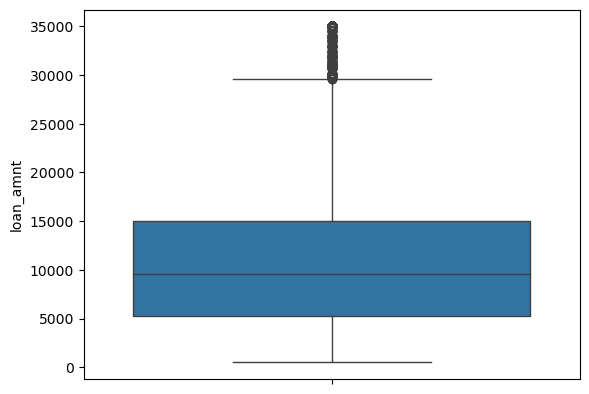

In [133]:
sns.boxplot(data1.loan_amnt)

In [136]:
data1['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<Axes: ylabel='funded_amnt'>

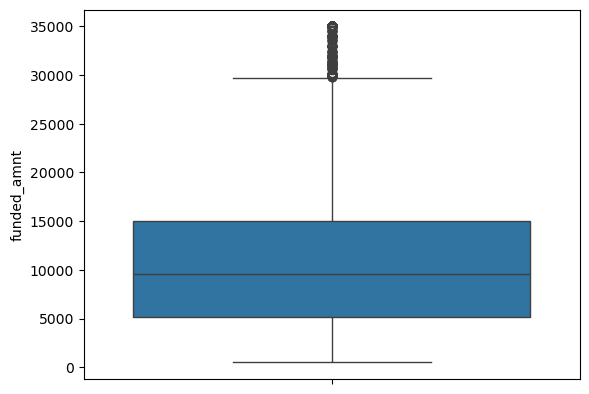

In [134]:
sns.boxplot(data1.funded_amnt)

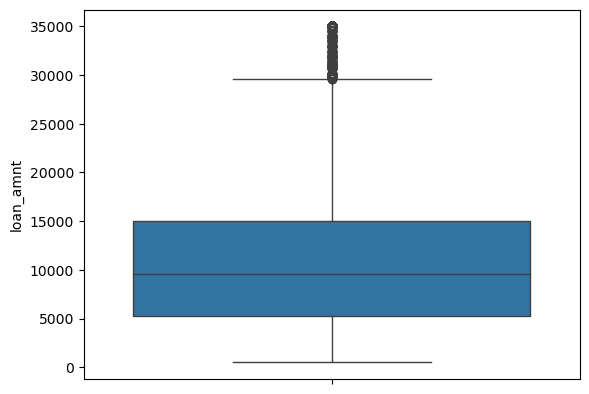

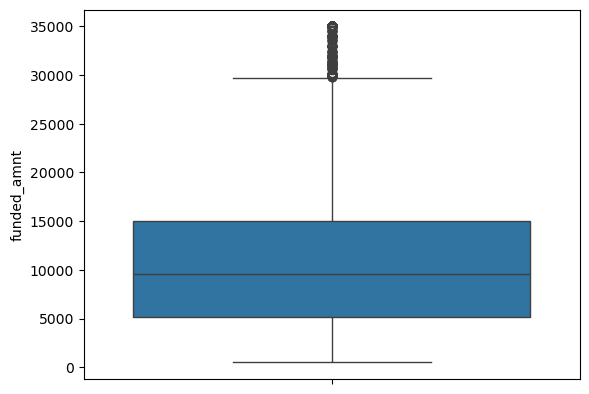

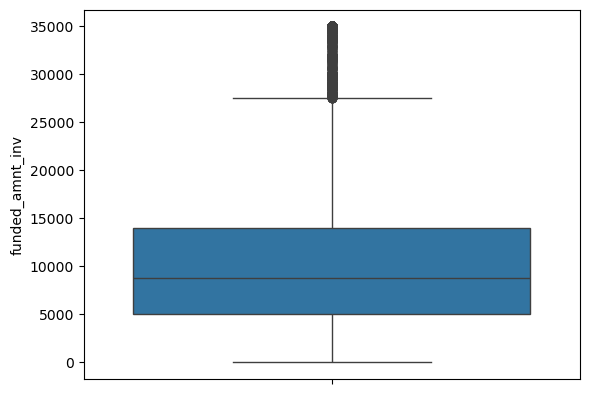

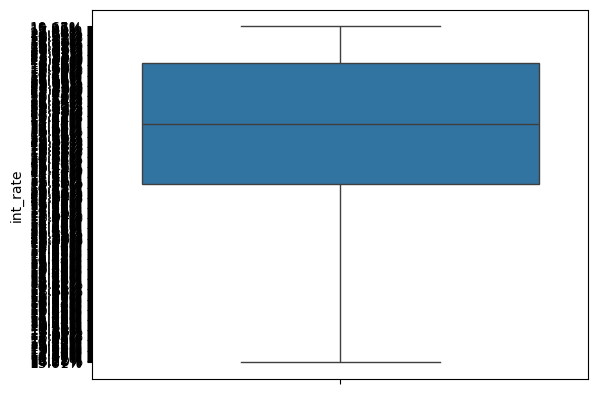

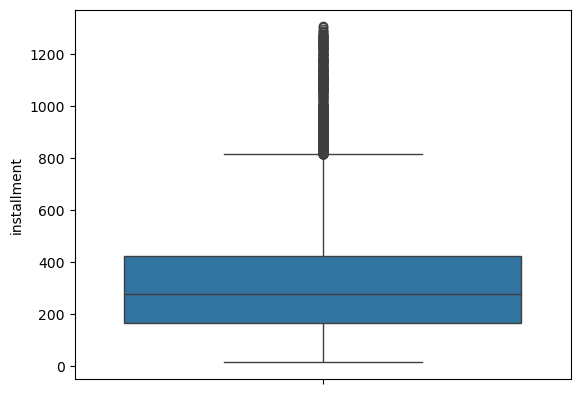

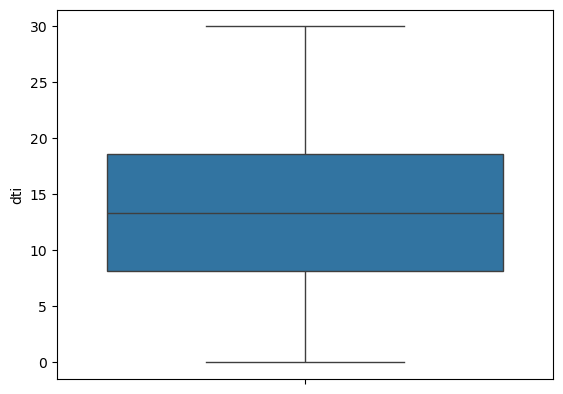

In [146]:
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    sns.boxplot(data1[c])
    plt.show()

Need to take care of int_rate

In [147]:
data1['int_rate'].describe()

count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object

In [148]:
data1.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.15%      1
21.48%      1
24.40%      1
16.01%      1
14.67%      1
Name: int_rate, Length: 370, dtype: int64

In [151]:
data1['int_rate'] = data1['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

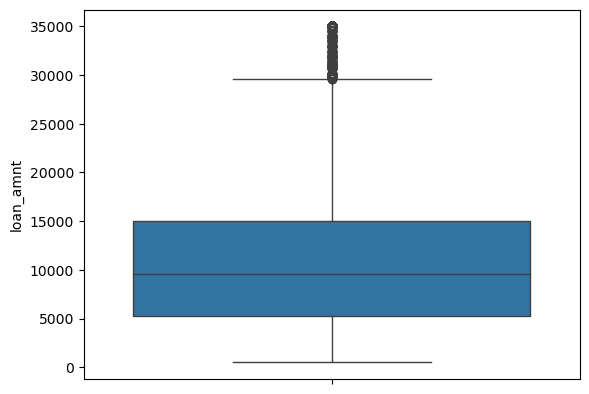

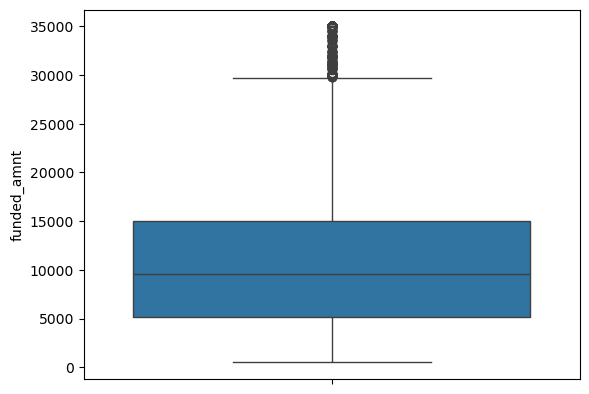

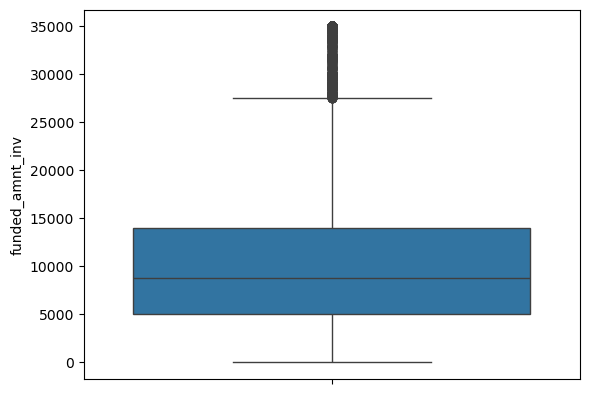

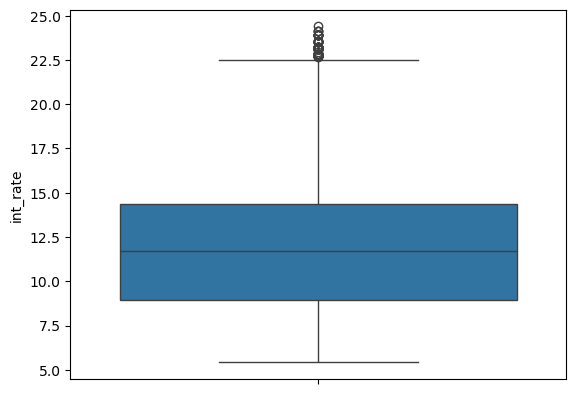

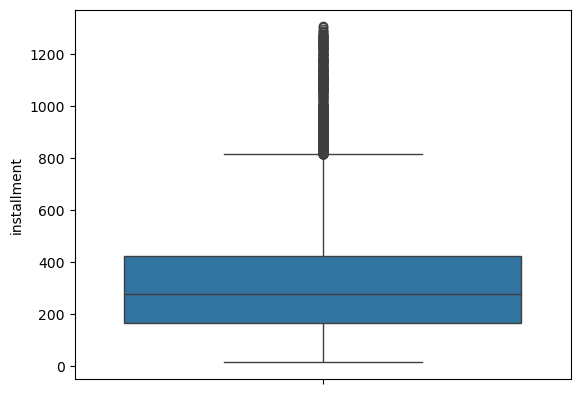

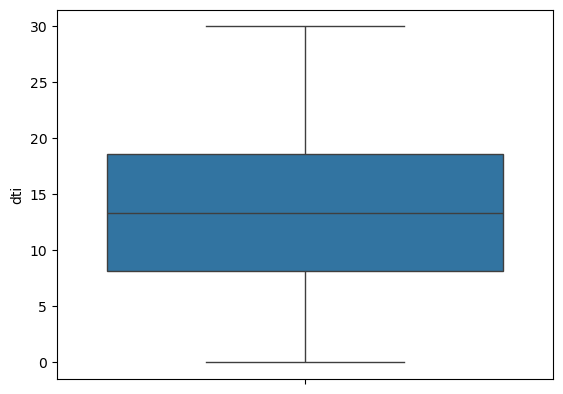

In [152]:
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    sns.boxplot(data1[c])
    plt.show()

<Axes: ylabel='int_rate'>

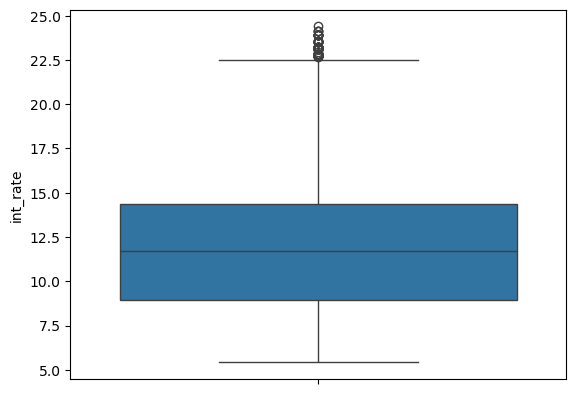

In [153]:
sns.boxplot(data1.int_rate)